In [ ]:
#importing dependencies
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#reading csv file
df = pd.read_csv('/content/bbc-text.csv')
df = df.sample(frac = 1)
df

,category,text
824,politics,prime minister s questions so who if anyone ...
553,tech,games win for blu-ray dvd format the next-gene...
163,entertainment,musical treatment for capra film the classic f...
756,tech,hotspot users gain free net calls people using...
718,tech,apple attacked over sources row civil libertie...
...,...,...
488,sport,pavey focuses on indoor success jo pavey will ...
1530,business,ford gains from finance not cars ford the us ...
795,sport,desailly backs blues revenge trip marcel desai...
1720,politics,mandelson warning to bbc the bbc should steer ...


In [ ]:
no_of_classes = set(df['category'])
no_of_classes

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [ ]:
#Analyzing data
df.groupby('category').category.count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: category, dtype: int64

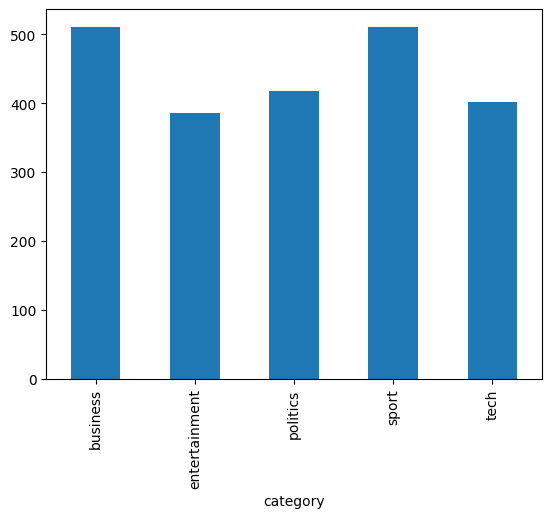

In [ ]:
df.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
#downloading stopwords
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stemmer = PorterStemmer()
stemmer.stem('computer')

'comput'

In [ ]:
plurals = ['computer','caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
           'plotted']
singles = ' '.join([stemmer.stem(plural) for plural in plurals])
singles

'comput caress fli die mule deni die agre own humbl size meet state siez item sensat tradit refer colon plot'

In [ ]:
#stemmer
stemmer = PorterStemmer()

plurals = df['text'][0].split()
singles = " ".join([stemmer.stem(plural) for plural in plurals])
singles

'tv futur in the hand of viewer with home theatr system plasma high-definit tv and digit video record move into the live room the way peopl watch tv will be radic differ in five year time. that is accord to an expert panel which gather at the annual consum electron show in la vega to discuss how these new technolog will impact one of our favourit pastimes. with the us lead the trend programm and other content will be deliv to viewer via home network through cabl satellit telecom compani and broadband servic provid to front room and portabl devices. one of the most talked-about technolog of ce ha been digit and person video record (dvr and pvr). these set-top box like the us s tivo and the uk s sky+ system allow peopl to record store play paus and forward wind tv programm when they want. essenti the technolog allow for much more personalis tv. they are also be built-in to high-definit tv set which are big busi in japan and the us but slower to take off in europ becaus of the lack of hig

In [ ]:
re.sub("[a-zA-Z]", " ", "Hello World. I am Python!")

'           .            !'

In [ ]:
# Regex
cleaned_data = lambda x: "".join([i for i in re.sub("[^a-zA-Z]", " ", x) ])
cleaned_data(singles)

'tv futur in the hand of viewer with home theatr system plasma high definit tv and digit video record move into the live room the way peopl watch tv will be radic differ in five year time  that is accord to an expert panel which gather at the annual consum electron show in la vega to discuss how these new technolog will impact one of our favourit pastimes  with the us lead the trend programm and other content will be deliv to viewer via home network through cabl satellit telecom compani and broadband servic provid to front room and portabl devices  one of the most talked about technolog of ce ha been digit and person video record  dvr and pvr   these set top box like the us s tivo and the uk s sky  system allow peopl to record store play paus and forward wind tv programm when they want  essenti the technolog allow for much more personalis tv  they are also be built in to high definit tv set which are big busi in japan and the us but slower to take off in europ becaus of the lack of hig

In [ ]:
re.sub("[^a-zA-Z]", " ", singles)

'tv futur in the hand of viewer with home theatr system plasma high definit tv and digit video record move into the live room the way peopl watch tv will be radic differ in five year time  that is accord to an expert panel which gather at the annual consum electron show in la vega to discuss how these new technolog will impact one of our favourit pastimes  with the us lead the trend programm and other content will be deliv to viewer via home network through cabl satellit telecom compani and broadband servic provid to front room and portabl devices  one of the most talked about technolog of ce ha been digit and person video record  dvr and pvr   these set top box like the us s tivo and the uk s sky  system allow peopl to record store play paus and forward wind tv programm when they want  essenti the technolog allow for much more personalis tv  they are also be built in to high definit tv set which are big busi in japan and the us but slower to take off in europ becaus of the lack of hig

In [ ]:
" ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", singles).split()])

'tv futur in the hand of viewer with home theatr system plasma high definit tv and digit video record move into the live room the way peopl watch tv will be radic differ in five year time that is accord to an expert panel which gather at the annual consum electron show in la vega to discuss how these new technolog will impact one of our favourit pastim with the us lead the trend programm and other content will be deliv to viewer via home network through cabl satellit telecom compani and broadband servic provid to front room and portabl devic one of the most talk about technolog of ce ha been digit and person video record dvr and pvr these set top box like the us s tivo and the uk s sky system allow peopl to record store play pau and forward wind tv programm when they want essenti the technolog allow for much more personali tv they are also be built in to high definit tv set which are big busi in japan and the us but slower to take off in europ becau of the lack of high definit program 

In [ ]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
data = re.sub("[^a-zA-Z]", " ", df['text'][0]).split()
for st in stop_words:
  c = data.count(st)
  for i in range(c):
    data.remove(st)

" ".join(data)

'tv future hands viewers home theatre systems plasma high definition tvs digital video recorders moving living room way people watch tv radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talked technologies ces digital personal video recorders dvr pvr set top boxes like us tivo uk sky system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also built high definition tv sets big business japan us slower take europe lack high definition programming people forward wind adverts also forget abiding network channel schedules putting together la carte entertainment us networks cable satellite companies worried means terms advertising revenues we

In [ ]:
df['text']

824     prime minister s questions so who  if anyone  ...
553     games win for blu-ray dvd format the next-gene...
163     musical treatment for capra film the classic f...
756     hotspot users gain free net calls people using...
718     apple attacked over sources row civil libertie...
                              ...                        
488     pavey focuses on indoor success jo pavey will ...
1530    ford gains from finance not cars ford  the us ...
795     desailly backs blues revenge trip marcel desai...
1720    mandelson warning to bbc the bbc should steer ...
529     newcastle line up babayaro newcastle manager g...
Name: text, Length: 2225, dtype: object

In [ ]:
#cleaning dataset
nltk.download('stopwords')
words = stopwords.words("english")
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,category,text,cleaned
824,politics,prime minister s questions so who if anyone ...,prime minist question anyon play polit secur n...
553,tech,games win for blu-ray dvd format the next-gene...,game win blu ray dvd format next gener dvd for...
163,entertainment,musical treatment for capra film the classic f...,music treatment capra film classic film wonder...
756,tech,hotspot users gain free net calls people using...,hotspot user gain free net call peopl use wire...
718,tech,apple attacked over sources row civil libertie...,appl attack sourc row civil liberti group elec...
...,...,...,...
488,sport,pavey focuses on indoor success jo pavey will ...,pavey focus indoor success jo pavey miss janua...
1530,business,ford gains from finance not cars ford the us ...,ford gain financ car ford us car compani repor...
795,sport,desailly backs blues revenge trip marcel desai...,desailli back blue reveng trip marcel desailli...
1720,politics,mandelson warning to bbc the bbc should steer ...,mandelson warn bbc bbc steer away demonis ex d...


In [ ]:
d = {"go","going","gone","Computer","Computing"}
f = {"go",}
n = 4

In [ ]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [ ]:
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
df

,category,text,cleaned
824,politics,prime minister s questions so who if anyone ...,prime minist s question so who if anyon is pla...
553,tech,games win for blu-ray dvd format the next-gene...,game win for blu ray dvd format the next gener...
163,entertainment,musical treatment for capra film the classic f...,music treatment for capra film the classic fil...
756,tech,hotspot users gain free net calls people using...,hotspot user gain free net call peopl use wire...
718,tech,apple attacked over sources row civil libertie...,appl attack over sourc row civil liberti group...
...,...,...,...
488,sport,pavey focuses on indoor success jo pavey will ...,pavey focus on indoor success jo pavey will mi...
1530,business,ford gains from finance not cars ford the us ...,ford gain from financ not car ford the us car ...
795,sport,desailly backs blues revenge trip marcel desai...,desailli back blue reveng trip marcel desailli...
1720,politics,mandelson warning to bbc the bbc should steer ...,mandelson warn to bbc the bbc should steer awa...


In [ ]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()

X = df['cleaned']
Y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05) #Splitting dataset
# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression())])
#Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [ ]:
X_test

1634    soni psp handheld consol hit us the latest han...
1252    blinx sequel purr nice the origin blinx wa int...
1174    what realli divid the parti so what is the gap...
1696    us airway staff agre to pay cut a union repres...
389     will tori tax cut lift spirit michael howard h...
                              ...                        
2151    lion blow to world cup star british and irish ...
1026    newcastl gloucest newcastl centr mathew tait a...
1537    classi henman make win start tim henman open h...
2013    trade gap narrow as export rise the uk s trade...
1118    ireland call up uncap campbel ulster scrum hal...
Name: cleaned, Length: 112, dtype: object

In [ ]:
predict = model.predict(X_test.iloc[0:1])
print(predict)


['tech']


In [ ]:
predict = model.predict(X_test)
predict

array(['tech', 'tech', 'politics', 'business', 'politics', 'sport',
       'politics', 'sport', 'sport', 'tech', 'sport', 'politics',
       'politics', 'business', 'business', 'politics', 'sport',
       'entertainment', 'politics', 'entertainment', 'business',
       'entertainment', 'sport', 'entertainment', 'sport', 'sport',
       'business', 'entertainment', 'entertainment', 'tech', 'business',
       'business', 'sport', 'business', 'politics', 'business',
       'business', 'entertainment', 'politics', 'business', 'politics',
       'entertainment', 'sport', 'business', 'business', 'sport',
       'business', 'entertainment', 'entertainment', 'tech',
       'entertainment', 'sport', 'tech', 'business', 'tech', 'sport',
       'politics', 'tech', 'sport', 'entertainment', 'sport',
       'entertainment', 'politics', 'entertainment', 'sport',
       'entertainment', 'business', 'business', 'entertainment', 'sport',
       'sport', 'entertainment', 'sport', 'business', 'politics',

In [ ]:
y_test

1634        tech
1252        tech
1174    politics
1696    business
389     politics
          ...   
2151       sport
1026       sport
1537       sport
2013    business
1118       sport
Name: category, Length: 112, dtype: object

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
predict = model.predict(X_test)
print(accuracy_score(y_test,predict)*100)
print('\n')


98.21428571428571




In [ ]:
data = {'news':[input("Enter news = ") for i in range(2)]}
data = pd.DataFrame(data)
predict = model.predict(data['news'])
print(predict)

Enter news = sdfsdf
Enter news = sfsdfdsfsdf
['sport' 'sport']


In [ ]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(model.predict(X_test),ytest))

               precision    recall  f1-score   support

     business       1.00      1.00      1.00        33
entertainment       0.94      0.94      0.94        18
     politics       0.95      0.95      0.95        19
        sport       1.00      1.00      1.00        20
         tech       0.95      0.95      0.95        22

     accuracy                           0.97       112
    macro avg       0.97      0.97      0.97       112
 weighted avg       0.97      0.97      0.97       112

[[33  0  0  0  0]
 [ 0 17  0  0  1]
 [ 0  1 18  0  0]
 [ 0  0  0 20  0]
 [ 0  0  1  0 21]]
